# SVC Nested Cross-Validation 

Here I will attempt to implement a nested cross-validation scheme in order to optimise a Support Vector Classification model via performing model selection and hyperparameter tuning simulatenously. 

## 1. Loading Data

In [1]:
# Importing general packagaes 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data
data_path = r"glass.xlsx"
glass_data = pd.read_excel(data_path)

In [5]:
print(glass_data.head())

   id       ri  Sodium  Magnesium  Aluminium  Silicon  Potassium  Calcium  \
0   1  1.52101   13.64       4.49       1.10    71.78       0.06     8.75   
1   2  1.51761   13.89       3.60       1.36    72.73       0.48     7.83   
2   3  1.51618   13.53       3.55       1.54    72.99       0.39     7.78   
3   4  1.51766   13.21       3.69       1.29    72.61       0.57     8.22   
4   5  1.51742   13.27       3.62       1.24    73.08       0.55     8.07   

   Barium  Iron  Glass Type  
0     0.0   0.0           1  
1     0.0   0.0           1  
2     0.0   0.0           1  
3     0.0   0.0           1  
4     0.0   0.0           1  


In [7]:
label = "Glass Type"
# Leaving out ID as this obviously doesn't provide any useful information regarding the glass
features_to_use = ['ri', 'Sodium', 'Magnesium', 'Aluminium', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']

data = glass_data[features_to_use]
label = glass_data[label]

print(data.head())

        ri  Sodium  Magnesium  Aluminium  Silicon  Potassium  Calcium  Barium  \
0  1.52101   13.64       4.49       1.10    71.78       0.06     8.75     0.0   
1  1.51761   13.89       3.60       1.36    72.73       0.48     7.83     0.0   
2  1.51618   13.53       3.55       1.54    72.99       0.39     7.78     0.0   
3  1.51766   13.21       3.69       1.29    72.61       0.57     8.22     0.0   
4  1.51742   13.27       3.62       1.24    73.08       0.55     8.07     0.0   

   Iron  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  


## 2. Assessing Deafualt SVC Performance 

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statistics import mean

# Defining SVC and leaving all parameters as default values 
# C = 1.0, kernel = 'rbf', degree = 3, gamma = 'scale'
svc = SVC()

# Fitting the model without optimising parameters

default_accuracies = []
for iteration in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)
    svc.fit(X_train, y_train)
    # Model's predictions
    yhat = svc.predict(X_test)
    # Append performance accuracy to existing list
    default_accuracies.append(accuracy_score(yhat, y_test))

In [12]:
print("Default SVC average accuracy performance: ", mean(default_accuracies))

Default SVC average accuracy performance:  0.30930232558139537


In [13]:
# Function which plots a clear and easy to read confusion matrix
def confusionMatrixPlot(cm, labels):
    # Useful statistics
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    # Plot
    plt.figure(figsize=(32, 24))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.colorbar()
    plt.xticks(np.arange(len(labels)), labels, rotation=45)
    plt.yticks(np.arange(len(labels)), labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label \n Accuracy = {:0.4f}; Misclass = {:0.4f}.'.format(accuracy, misclass))
    plt.show()

In [26]:
cm = confusion_matrix(y_test, yhat)
labels = list(y_test.unique())
labels.sort

<function list.sort(*, key=None, reverse=False)>

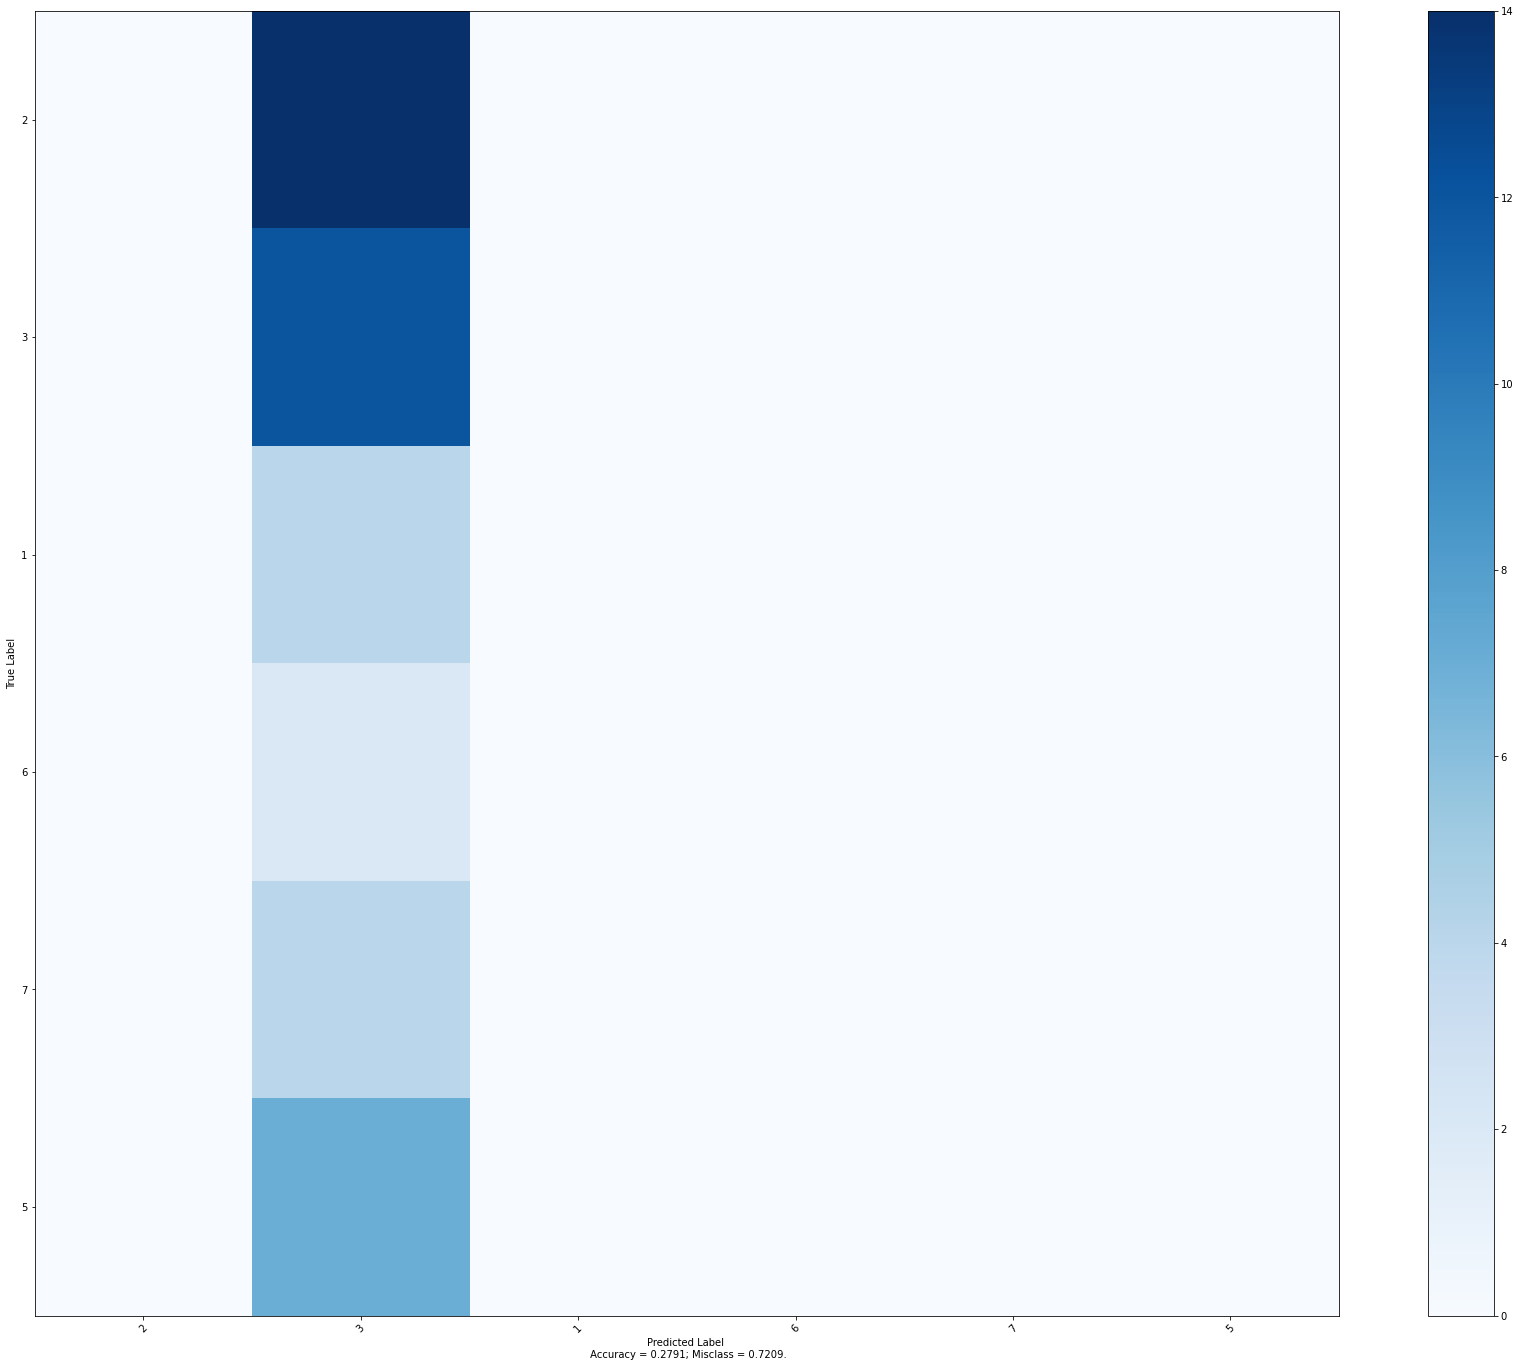

In [27]:
confusionMatrixPlot(cm, labels)

As can be seen from the above confusion matrix, as well as the poor average accuracy score, the default SVC model performs particularly poorly, and seemingly classifies every input into one class (2nd class). This is a consequence of the model's hyperparameters not being fine tuned. Considering this, it is seemingly rational to predict that finding the optimal hyperparameters for a SVC model being fitted to this data-set will exhibit a increase in classification performance.    

## 3. Nested Cross-Validation